# Batch and Stochastic Training

This python function illustrates two different training methods: batch and stochastic training.  For each model, we will use a regression model that predicts one model variable.

We start by loading the necessary libraries and resetting the computational graph.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

We start a computational graph session.

In [2]:
sess = tf.Session()

# Stochastic Training

----------------------

### Generate Data

The data we will create is 100 random samples from a `Normal(mean = 1, sd = 0.1)`.  The target will be an array of size 100 filled with the constant 10.0.

We also create the necessary placeholders in the graph for the data and target.  Note that we use a shape of `[1]` for stochastic training.

In [3]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)

x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)

### Model Variables and Operations

We create the one variable in the graph, `A`.  We then create the model operation, which is just the multiplication of the input data and `A`.

In [4]:
# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(shape=[1]))

# Add operation to graph
my_output = tf.multiply(x_data, A)

### Loss Function

For this, we choose the L2 loss.  We can easily choose the L1 loss by replacing `tf.square()` with `tf.abs()`.

In [5]:
# Add L2 loss operation to graph
loss = tf.square(my_output - y_target)

### Optimization and Initialization

For the optimization function, we will choose the standard Gradient Descent Algorithm with a learning rate of `0.02`.  We also add and run a variable initialization operation.

In [6]:
# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

### Train Model

We run the training step for 100 iterations and print off the value of `A` and the loss every 5 iterations.

In [7]:
loss_stochastic = []
# Run Loop
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_stochastic.append(temp_loss)

Step #5 A = [ 2.15584159]
Loss = [ 59.26628113]
Step #10 A = [ 3.6463747]
Loss = [ 38.98156357]
Step #15 A = [ 4.82094002]
Loss = [ 22.86421394]
Step #20 A = [ 5.77139997]
Loss = [ 19.58551025]
Step #25 A = [ 6.52262354]
Loss = [ 9.57485962]
Step #30 A = [ 7.12625837]
Loss = [ 6.36455345]
Step #35 A = [ 7.63606024]
Loss = [ 2.55103087]
Step #40 A = [ 7.93105412]
Loss = [ 2.34990478]
Step #45 A = [ 8.30565166]
Loss = [ 2.08385348]
Step #50 A = [ 8.55292988]
Loss = [ 6.9521904]
Step #55 A = [ 8.81163883]
Loss = [ 1.32351923]
Step #60 A = [ 8.95606041]
Loss = [ 6.76757669]
Step #65 A = [ 9.12868977]
Loss = [ 0.61686873]
Step #70 A = [ 9.18059349]
Loss = [ 0.01681929]
Step #75 A = [ 9.22375107]
Loss = [ 0.00448726]
Step #80 A = [ 9.28870773]
Loss = [ 0.08788975]
Step #85 A = [ 9.44317436]
Loss = [ 0.01499911]
Step #90 A = [ 9.61464977]
Loss = [ 0.00621458]
Step #95 A = [ 9.65019512]
Loss = [ 0.32731441]
Step #100 A = [ 9.64083195]
Loss = [ 0.31338796]


# Batch Training

------------------

We start by resetting the computational graph

In [8]:
# Batch Training:
# Re-initialize graph
ops.reset_default_graph()
sess = tf.Session()

For Batch training, we need to declare our batch size. The larger the batch size, the smoother the convergence will be towards the optimal value.  But if the batch size is too large, the optimization algorithm may get stuck in a local minimum, where a more stochastic convergence may jump out.

Here, the we may change the batch size from 1 to 100 to see the effects of the batch size on the convergence plots at the end.

In [9]:
# Declare batch size
batch_size = 25

### Generate the Data

The data we will create is 100 random samples from a `Normal(mean = 1, sd = 0.1)`.  The target will be an array of size 100 filled with the constant 10.0.

We also create the necessary placeholders in the graph for the data and target.

Note that here, our placeholders have shape `[None, 1]`, where the batch size will take the place of the `None` dimension.

In [10]:
# Create data
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

### Model Variables and Operations

We create the one variable in the graph, `A`.  We then create the model operation, which is just the multiplication of the input data and `A`.

In [11]:
# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(shape=[1,1]))

# Add operation to graph
my_output = tf.matmul(x_data, A)

### Loss Function

For this, we choose the L2 loss.  We can easily choose the L1 loss by replacing `tf.square()` with `tf.abs()`.

In [12]:
# Add L2 loss operation to graph
loss = tf.reduce_mean(tf.square(my_output - y_target))

### Optimization and Initialization

For the optimization function, we will choose the standard Gradient Descent Algorithm with a learning rate of `0.02`.  We also add and run a variable initialization operation.

In [13]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

### Train Model

We run the training step for 100 iterations and print off the value of `A` and the loss every 5 iterations.

Note that here we select a batch of data instead of just one data point.

In [14]:
loss_batch = []
# Run Loop
for i in range(100):
    rand_index = np.random.choice(100, size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_batch.append(temp_loss)

Step #5 A = [[ 1.87009048]]
Loss = 65.4902
Step #10 A = [[ 3.36440945]]
Loss = 45.8059
Step #15 A = [[ 4.58703709]]
Loss = 29.0102
Step #20 A = [[ 5.57683086]]
Loss = 19.0908
Step #25 A = [[ 6.38111591]]
Loss = 13.8178
Step #30 A = [[ 7.03755045]]
Loss = 10.0696
Step #35 A = [[ 7.5764699]]
Loss = 6.38239
Step #40 A = [[ 8.01234055]]
Loss = 5.45151
Step #45 A = [[ 8.35609531]]
Loss = 2.84672
Step #50 A = [[ 8.64307308]]
Loss = 2.26105
Step #55 A = [[ 8.84179211]]
Loss = 2.03782
Step #60 A = [[ 9.0474844]]
Loss = 1.74324
Step #65 A = [[ 9.21524715]]
Loss = 1.54201
Step #70 A = [[ 9.32061958]]
Loss = 1.09765
Step #75 A = [[ 9.4463768]]
Loss = 1.29265
Step #80 A = [[ 9.53134918]]
Loss = 0.934568
Step #85 A = [[ 9.59794903]]
Loss = 0.810933
Step #90 A = [[ 9.66680145]]
Loss = 1.40375
Step #95 A = [[ 9.71764565]]
Loss = 1.36738
Step #100 A = [[ 9.73819923]]
Loss = 0.717119


# Plot Stochastic vs Batch Training

Here is the matplotlib code to plot the loss for each.

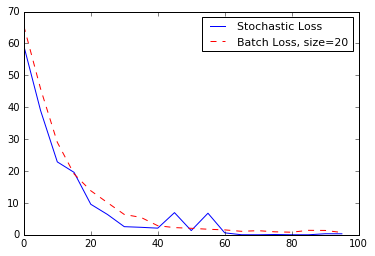

In [15]:
plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='Stochastic Loss')
plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss, size=20')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()